<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/07-Paddy/Nb_07_paddy_data_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving 2021_2022 Maha.csv to 2021_2022 Maha.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
df = pd.read_csv('2021_2022 Maha.csv')

In [5]:
df

,District,Major_Schemes_Sown,Minor_Schemes_Sown,Rainfed_Sown,All_Schemes_Sown,Major_Schemes_Harvested,Minor_Schemes_Harvested,Rainfed_Harvested,All_Schemes_Harvested,Major_Schemes_Yield,Minor_Schemes_Yield,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
0,COLOMBO,324,710,2796,3830,324,710,2777,3811,3321,2236,2500,2521,3239,8166
1,GAMPAHA,1659,3076,6776,11511,1556,3036,6610,11202,2056,2671,3105,2842,9522,27059
2,KALUTARA,145,1573,10221,11939,129,1544,9893,11566,3716,2341,2583,2563,10669,27349
3,KANDY,4268,5181,2762,12211,4268,5176,2757,12201,3092,3190,3540,3235,9649,31211
4,MATALE,7628,7839,4525,19992,7593,7815,4512,19920,3089,3601,3304,3339,17914,59812
5,NUWARAELIYA,900,4133,11,5044,900,4126,8,5034,4652,3763,3870,3922,2836,11126
6,GALLE,144,1756,9335,11235,144,1706,9071,10921,2653,2825,2453,2514,8546,21486
7,MATARA,4259,3193,6233,13685,4105,2963,6110,13178,3149,2625,2573,2764,10404,28761
8,HAMBANTOTA,29498,5463,1143,36104,29438,5438,1131,36007,4144,3180,3202,3969,31459,124870
9,JAFFNA,-,-,11127,11127,-,-,7775,7775,-,-,2176,2176,6899,15013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   District                 26 non-null     object
 1   Major_Schemes_Sown       26 non-null     object
 2   Minor_Schemes_Sown       26 non-null     object
 3   Rainfed_Sown             26 non-null     int64 
 4   All_Schemes_Sown         26 non-null     int64 
 5   Major_Schemes_Harvested  26 non-null     object
 6   Minor_Schemes_Harvested  26 non-null     object
 7   Rainfed_Harvested        26 non-null     int64 
 8   All_Schemes_Harvested    26 non-null     int64 
 9   Major_Schemes_Yield      26 non-null     object
 10  Minor_Schemes_Yield      26 non-null     object
 11  Rainfed_Yield            26 non-null     int64 
 12  Average_Yield            26 non-null     int64 
 13  Nett_Extent_Harvested    26 non-null     int64 
 14  Total_Production         26 non-null     int

In [7]:
df.describe()

,Rainfed_Sown,All_Schemes_Sown,Rainfed_Harvested,All_Schemes_Harvested,Rainfed_Yield,Average_Yield,Nett_Extent_Harvested,Total_Production
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,16662.692308,59680.461538,16195.076923,58934.461538,2589.153846,2853.038462,52704.923077,1.485562e+05
std,41683.252438,148837.309992,40547.692147,147041.177843,633.483303,524.696749,131493.600610,3.711223e+05
min,11.000000,3830.000000,8.000000,3811.000000,1304.000000,1639.000000,2836.000000,8.166000e+03
25%,2770.500000,12007.000000,2762.000000,11724.750000,2173.000000,2515.750000,9837.750000,2.770200e+04
50%,6504.500000,20229.000000,6360.000000,19874.000000,2549.000000,2847.500000,18310.500000,4.719300e+04
75%,13029.750000,38763.500000,12982.750000,38723.500000,3029.500000,3197.500000,35987.250000,9.954775e+04
max,216615.000000,775846.000000,210536.000000,766148.000000,3870.000000,3969.000000,685164.000000,1.931230e+06


In [8]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop('Total_Production', axis=1)
y = df['Total_Production']

mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values(by='MI', ascending=False)
print(mi_df)

##########  Higher MI → feature provides more information about the target


ValueError: could not convert string to float: 'COLOMBO'

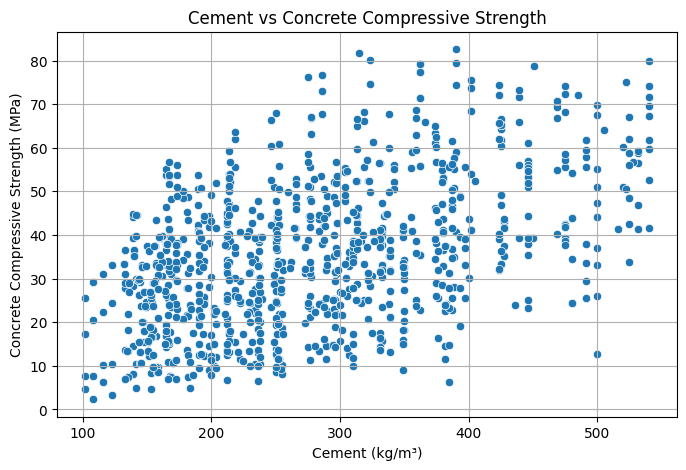

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Cement vs Concrete compressive strength
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength ')
plt.xlabel("Cement (kg/m³)")
plt.ylabel("Concrete Compressive Strength (MPa)")
plt.title("Cement vs Concrete Compressive Strength")
plt.grid(True)
plt.show()


/tmp/ipython-input-3754615293.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_target_per_bin = df.groupby('bin')['Concrete compressive strength '].mean()


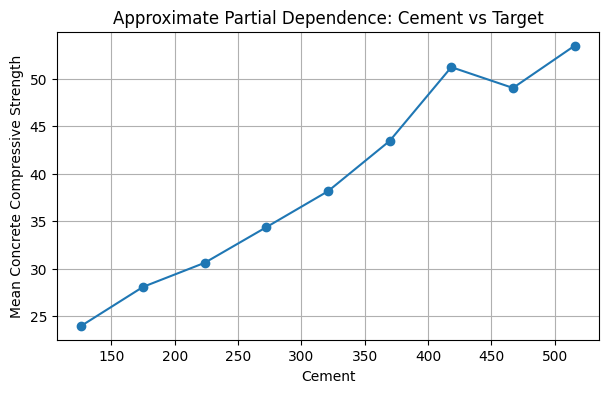

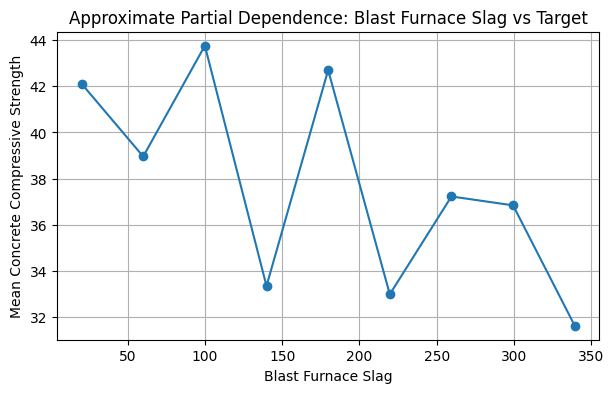

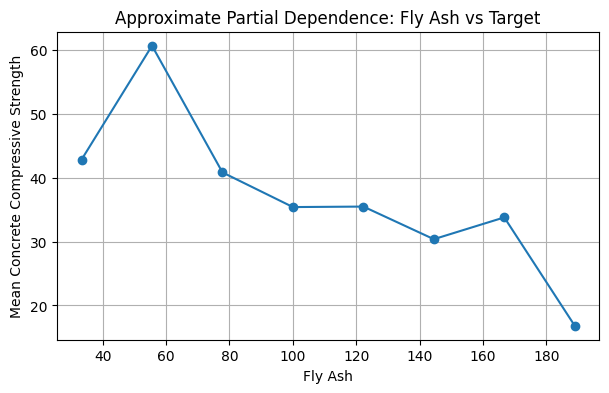

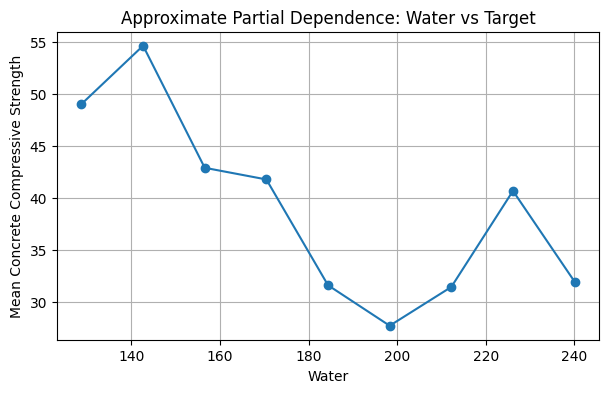

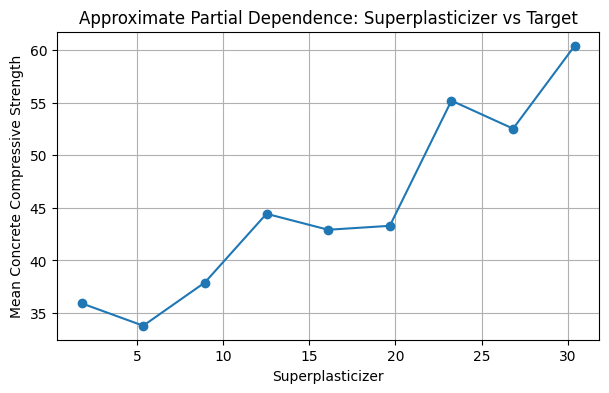

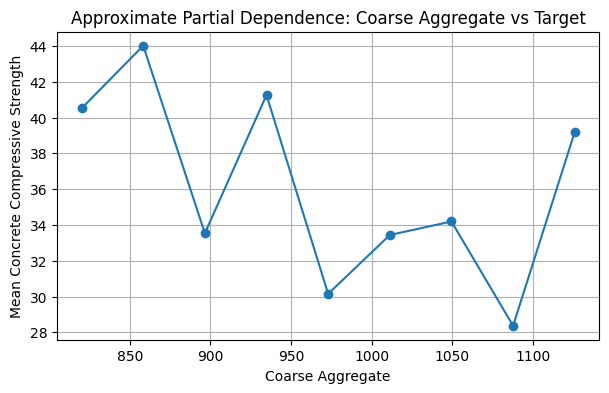

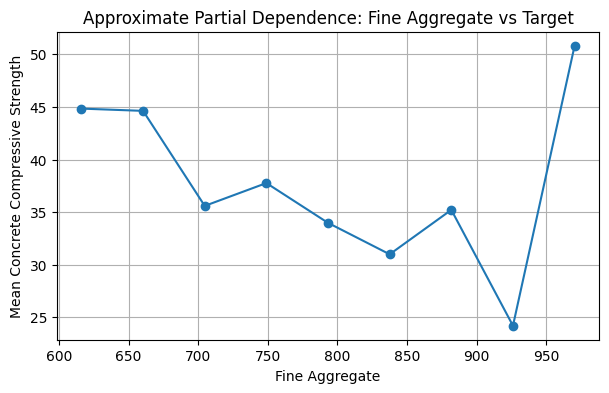

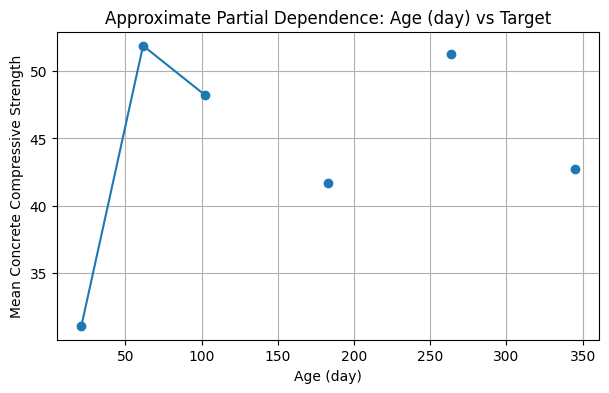

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List all features except the target
features = df.columns.drop('Concrete compressive strength ')

# Number of bins
num_bins = 10

# Loop through each feature
for feature in features:
    # Define bins
    bins = np.linspace(df[feature].min(), df[feature].max(), num_bins)

    # Assign samples to bins
    df['bin'] = pd.cut(df[feature], bins)

    # Compute mean target per bin
    mean_target_per_bin = df.groupby('bin')['Concrete compressive strength '].mean()
    bin_centers = [interval.mid for interval in mean_target_per_bin.index]

    # Plot
    plt.figure(figsize=(7,4))
    plt.plot(bin_centers, mean_target_per_bin.values, marker='o', linestyle='-')
    plt.xlabel(feature)
    plt.ylabel("Mean Concrete Compressive Strength")
    plt.title(f"Approximate Partial Dependence: {feature} vs Target")
    plt.grid(True)
    plt.show()


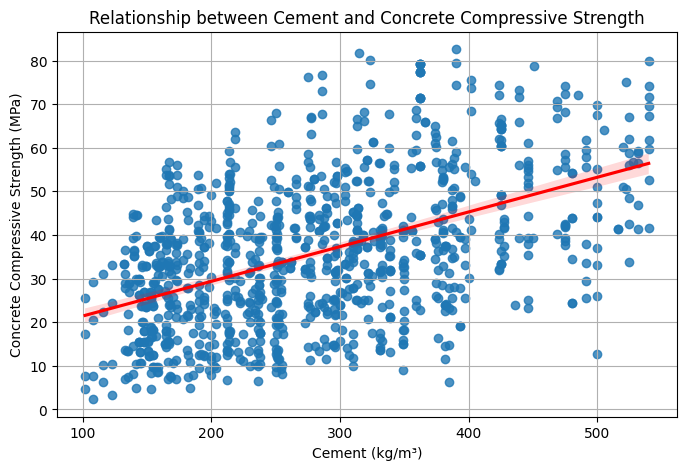

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x='Cement',
    y='Concrete compressive strength ',
    line_kws={"color": "red"}
)

plt.xlabel("Cement (kg/m³)")
plt.ylabel("Concrete Compressive Strength (MPa)")
plt.title("Relationship between Cement and Concrete Compressive Strength")
plt.grid(True)
plt.show()


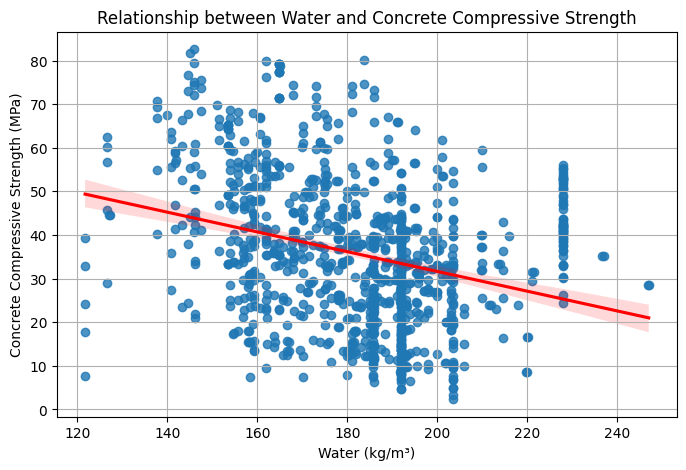

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Scatter plot with regression line
sns.regplot(
    data=df,
    x='Water',
    y='Concrete compressive strength ',
    line_kws={"color": "red"}
)

plt.xlabel("Water (kg/m³)")
plt.ylabel("Concrete Compressive Strength (MPa)")
plt.title("Relationship between Water and Concrete Compressive Strength")
plt.grid(True)
plt.show()
